In [5]:
import pandas as pd
import numpy as np


In [6]:
df= pd.read_csv('US_Regional_Sales_Data1.csv')
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Header
0,SO - 000101,In-Store,WARE-UHY1004,31-12-2017,31-05-2018,14-06-2018,19-06-2018,USD,6,15,259,12,5,0.075,"1,963.10","1,001.18",Data
1,SO - 000102,Online,WARE-NMK1003,31-12-2017,31-05-2018,22-06-2018,02-07-2018,USD,14,20,196,27,3,0.075,"3,939.60","3,348.66",Data
2,SO - 000103,Distributor,WARE-UHY1004,31-12-2017,31-05-2018,21-06-2018,01-07-2018,USD,21,16,213,16,1,0.050,"1,775.50",781.22,Data
3,SO - 000104,Wholesale,WARE-NMK1003,31-12-2017,31-05-2018,02-06-2018,07-06-2018,USD,28,48,107,23,8,0.075,"2,324.90","1,464.69",Data
4,SO - 000106,Online,WARE-PUJ1005,31-12-2017,31-05-2018,08-06-2018,13-06-2018,USD,12,21,285,1,5,0.050,"1,038.50",446.56,Data


In [7]:
dt=df[['OrderDate','Unit Price']]
dt.head()

,OrderDate,Unit Price
0,31-05-2018,"1,963.10"
1,31-05-2018,"3,939.60"
2,31-05-2018,"1,775.50"
3,31-05-2018,"2,324.90"
4,31-05-2018,"1,038.50"


In [8]:
dt = dt.rename(columns={'OrderDate':'Date', 'Unit Price':'Sales'})

In [9]:
dt.dtypes

Date     object
Sales    object
dtype: object

In [10]:
dt["Date"]=pd.to_datetime(dt["Date"])

c:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '31-05-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-06-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-06-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packag

In [11]:
dt["Sales"] = dt["Sales"].str.replace(",", "")
dt.head()

,Date,Sales
0,2018-05-31,1963.10
1,2018-05-31,3939.60
2,2018-05-31,1775.50
3,2018-05-31,2324.90
4,2018-05-31,1038.50


In [12]:
dt['Sales'] = dt['Sales'].astype(float)
dt.head()

,Date,Sales
0,2018-05-31,1963.1
1,2018-05-31,3939.6
2,2018-05-31,1775.5
3,2018-05-31,2324.9
4,2018-05-31,1038.5


In [13]:
dt.dtypes

Date     datetime64[ns]
Sales           float64
dtype: object

In [14]:
d=dt.groupby('Date')['Sales'].sum()
dt=pd.DataFrame(d)
dt.head()

,Sales
Date,
2018-01-06,31845.1
2018-01-07,14974.5
2018-01-08,15952.7
2018-01-09,13949.4
2018-01-10,14907.5


In [15]:
ts=dt['Sales'].resample('D').sum()
ts.tail()

Date
2020-12-26    16341.3
2020-12-27    25547.1
2020-12-28    46183.1
2020-12-29    18632.7
2020-12-30    10545.8
Freq: D, Name: Sales, dtype: float64

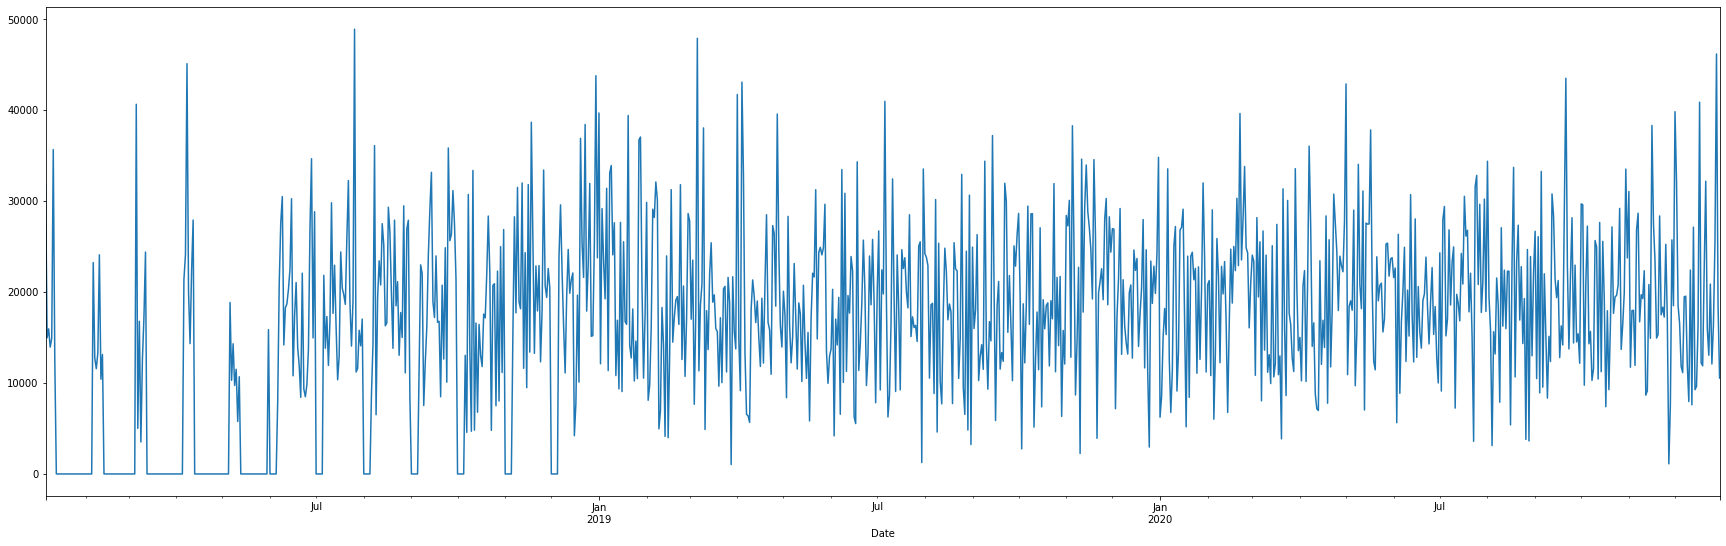

In [16]:
import matplotlib.pyplot as plt
pt=ts.plot( y='Sales', kind='line',figsize=(30,9))
plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
p=result[1]
rounded_num = '{0:.1f}'.format(p)
print('p-value:',rounded_num )   
print("Lags:",result[2])     

ADF Statistic: -5.309252
p-value: 0.0
Lags: 10


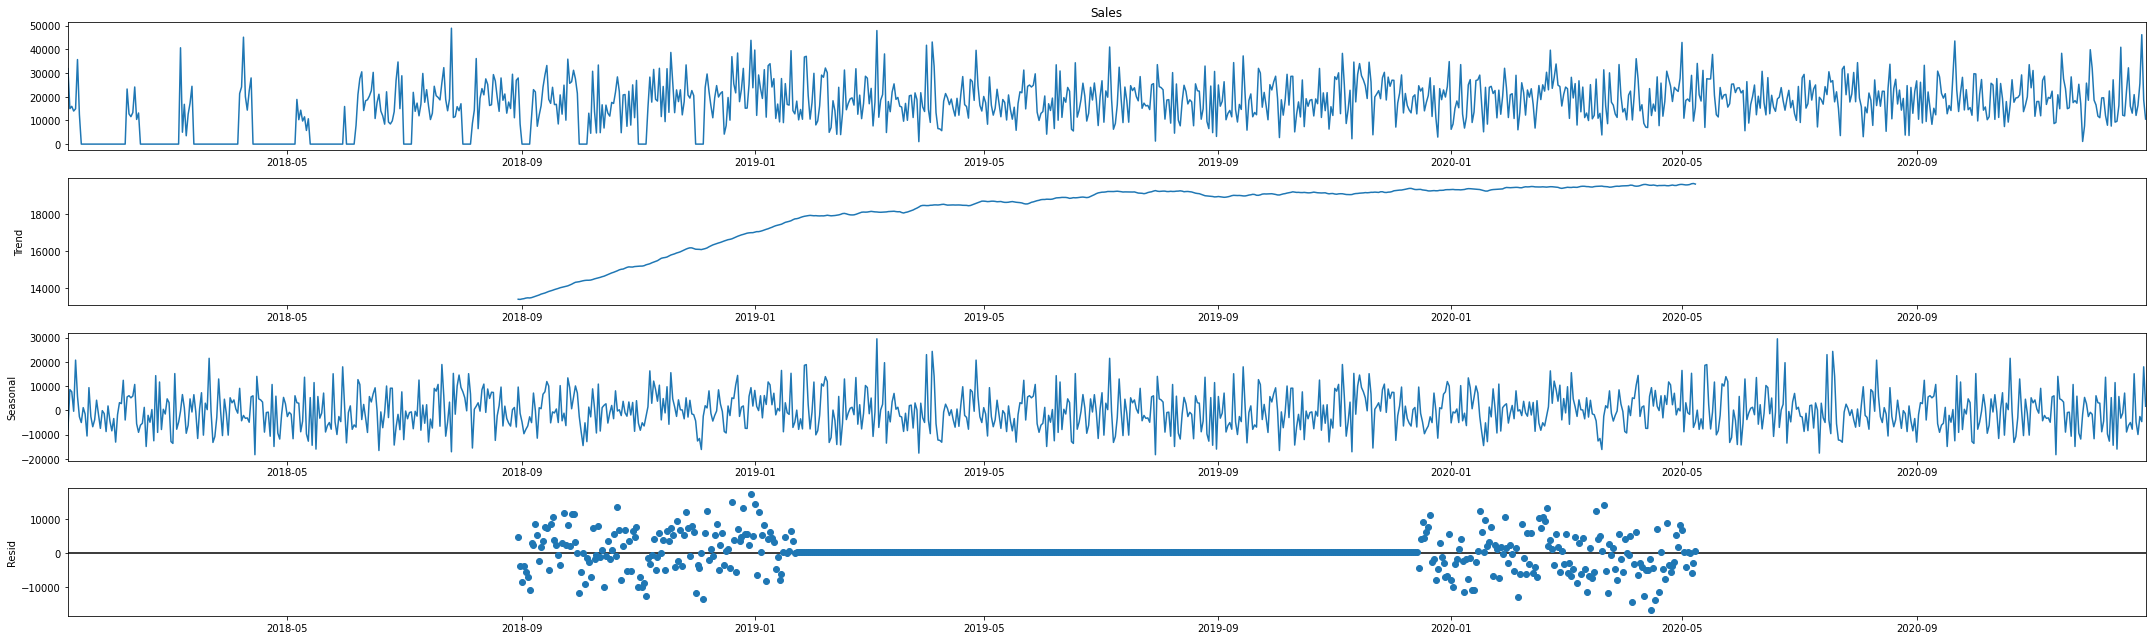

In [18]:
import statsmodels.api as sm
dcomp=sm.tsa.seasonal_decompose(ts,model="additive",period=int(len(dt)/2))
fig = dcomp.plot()
fig.set_size_inches((30, 9))
fig.tight_layout()
plt.show()

c:\Users\nithi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


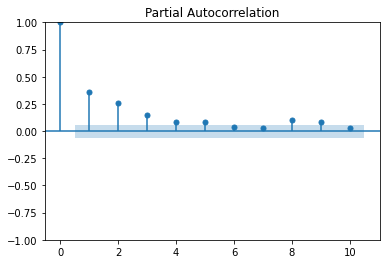

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf ,plot_acf
plot_pacf(ts,lags=10)
plt.show();

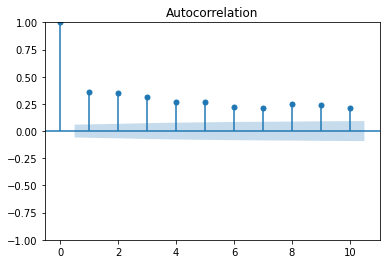

In [20]:
plot_acf(ts,lags=10)
plt.show()

In [21]:
len(ts)

1090

In [22]:
train=ts[:800]
test=ts[800:]

In [23]:
from statsmodels.tsa.arima.model import ARIMA
arima=ARIMA(train,order=(3,0,1)).fit()


In [24]:
predic = arima.predict(start=len(train),end=len(ts)-1)

<AxesSubplot:xlabel='Date'>

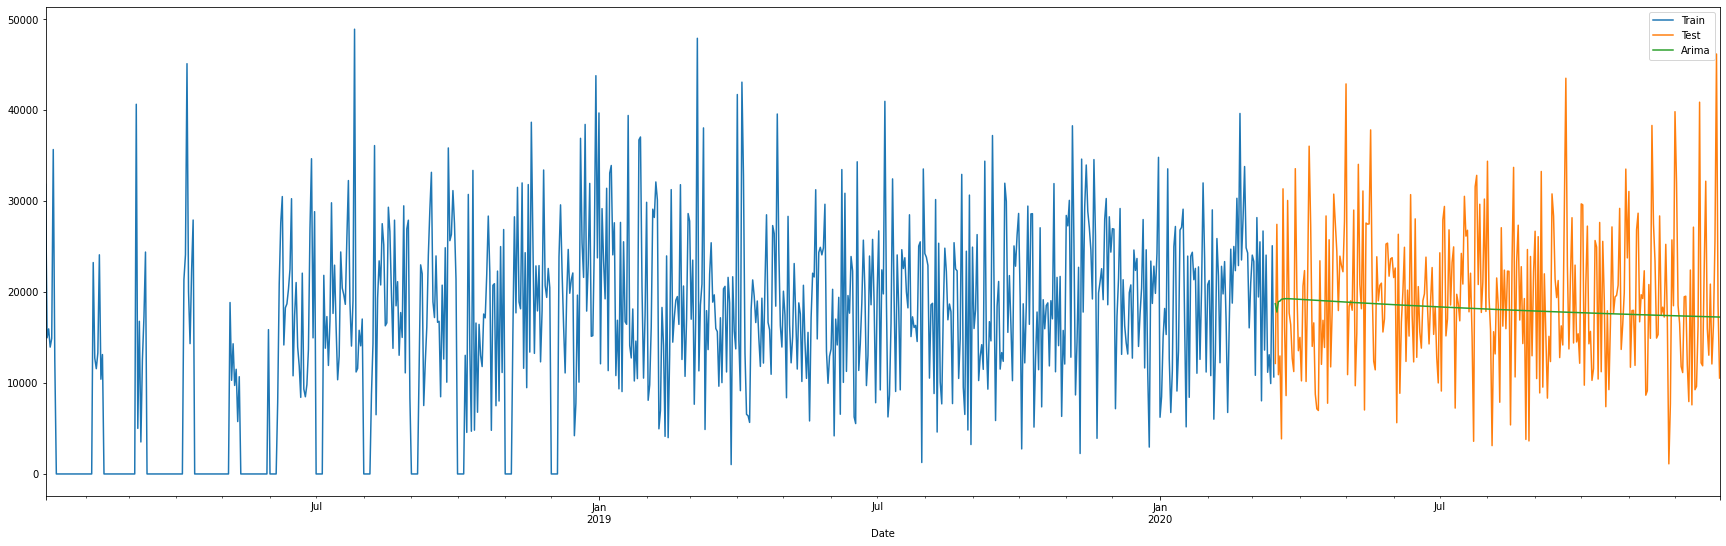

In [25]:
train.plot(legend=True,label='Train',figsize=(30,9))
test.plot(legend=True,label='Test')
predic.plot(legend=True,label='Arima')

In [26]:
final=ARIMA(ts,order=(3,0,1)).fit()
fpredic=final.predict(len(ts),len(ts)+365)
fpredic.head()

2020-12-31    17788.034061
2021-01-01    17773.958031
2021-01-02    18704.853190
2021-01-03    18832.325233
2021-01-04    18967.127459
Freq: D, Name: predicted_mean, dtype: float64

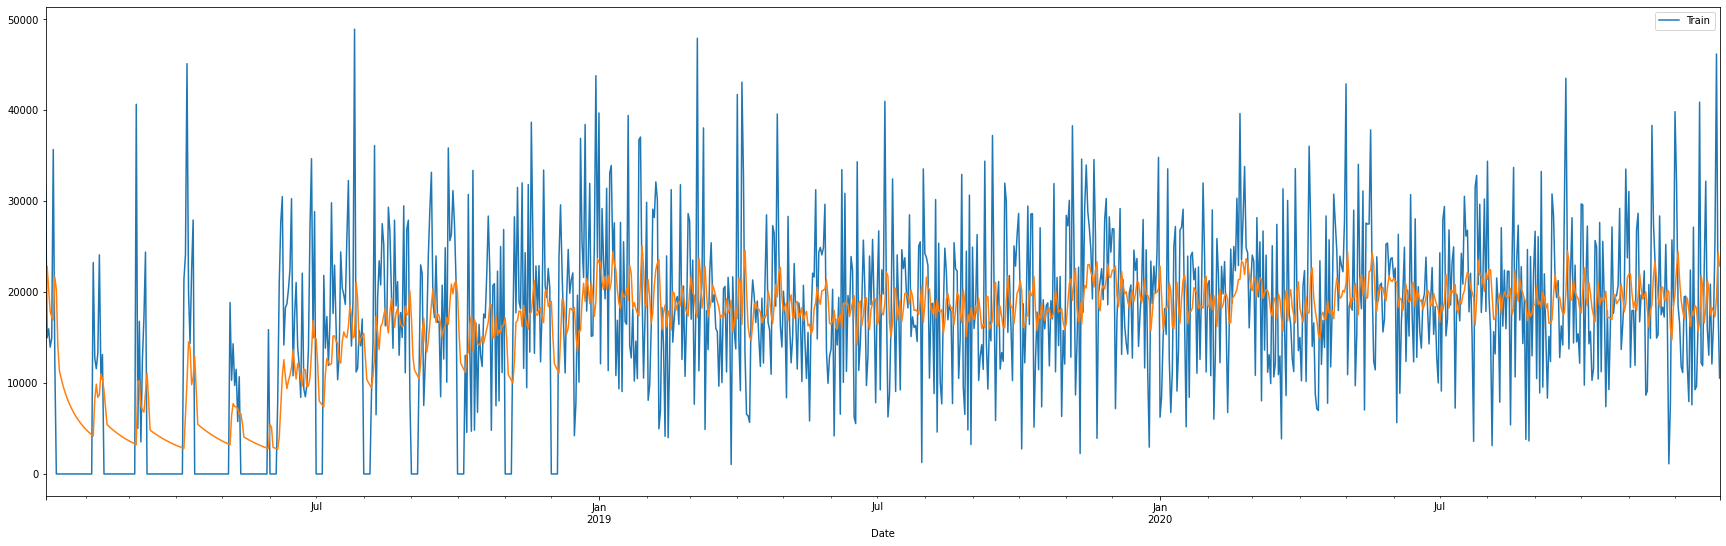

In [27]:
ts.plot(legend=True,label='Train',figsize=(30,9))
plt.plot(final.predict(ts.index.min(),ts.index.max()),label="Future_Forecast")



In [28]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,predic))

8054.4390574570925

In [29]:
forecast=

SyntaxError: invalid syntax (2323491240.py, line 1)

<AxesSubplot:xlabel='Date'>

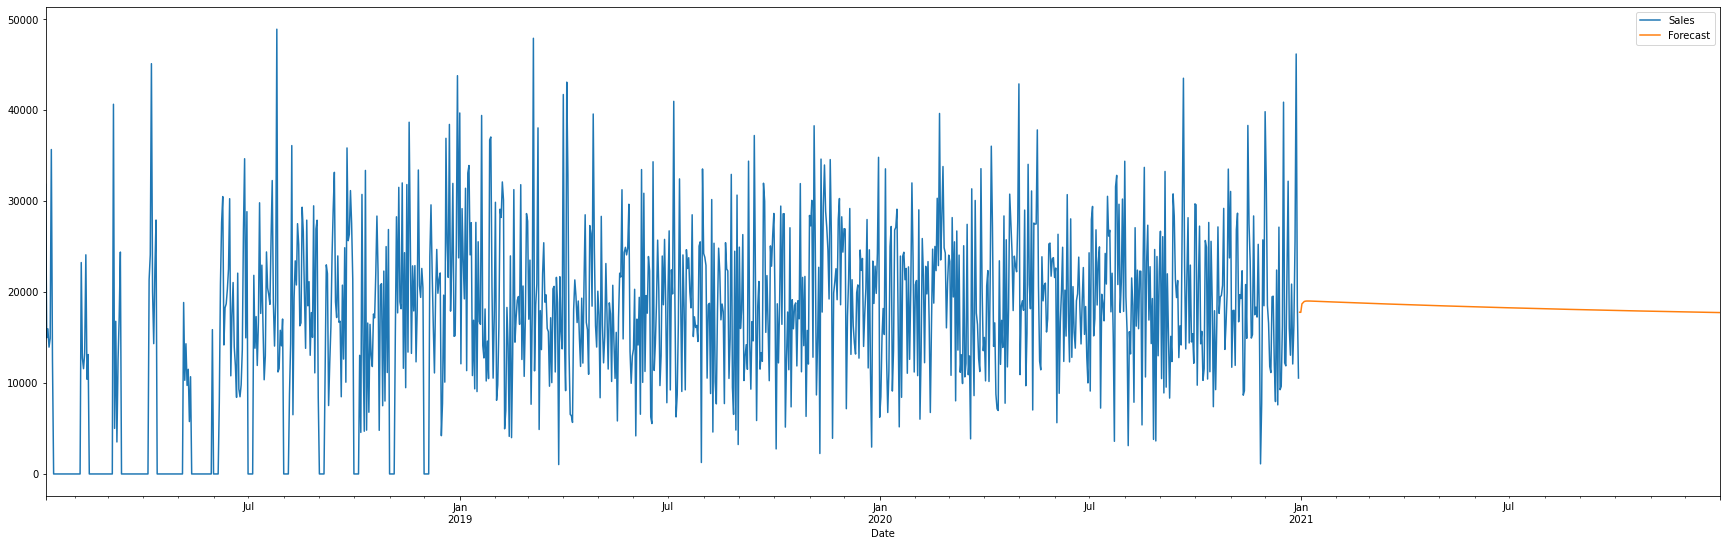

In [ ]:
ts.plot(legend=True,figsize=(30,9))
fpredic.plot(legend=True,label="Forecast")
